# Compare raw salmon NumReads values for the 5 samples that were counted in both the original compendia and in the new compendia

Because the compendia is a filtered set of RNAseq libraries, I included 5 samples that were originally processed to be a part of the compendia, but were filtered for not having enough reads.
This gives us the opportunity to assess whether the raw counts were the ~same in the original compendia as they were in the new compendia for these 5 libraries. 

To do this, I performed a linear regression between the raw salmon NumReads in the original compendia against the raw salmon NumReads produced by the snakefile `add_sra_to_compendia.snakefile`. The regressions are plotted below, with the equation and R<sup>2</sup> inline.

In [1]:
setwd("..")

In [2]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)

In [17]:
library(readr)
library(dplyr)
library(tibble)
library(ggplot2)
source("scripts/utils.R")

## functions

In [18]:
compare_raw <- function(original_compendia, new_compendia, srx_accession){
    original_compendia <- original_compendia %>%
      select(Name, original = one_of(srx_accession))
    new_compendia <- new_compendia %>%
      select(Name, new = one_of(srx_accession))
    joined_compendia <- left_join(original_compendia, new_compendia, by = "Name")
    
    ggplot(joined_compendia, aes(x = original, y = new)) +
      geom_point() +
      theme_classic() + 
      stat_smooth_func(geom = 'text', method = 'lm', hjust = 0, parse = T) +
      geom_smooth(method = "lm", se=FALSE, color="black", formula = y ~ x) +
      labs(title = srx_accession)
}

## PA14

In [5]:
pa14_raw_og <- read_csv("inputs/original_compendia/num_reads_pa14_cdna_k15.csv", show_col_types = F) %>%
  rename(TxName = "...1")
colnames(pa14_raw_og) <- gsub("\\.salmon", "", basename(colnames(pa14_raw_og)))
pa14_raw_new <- read_csv("outputs/combined_new_srx/num_reads_pa14.csv", show_col_types = F)

New names:
* `` -> ...1



In [20]:
table(colnames(pa14_raw_og) %in% colnames(pa14_raw_new))
shared_srx_acc <- colnames(pa14_raw_og)[colnames(pa14_raw_og) %in% colnames(pa14_raw_new)][2:6]


FALSE  TRUE 
 2848     6 

In [25]:
pa14_shared_lm <- lapply(shared_srx_acc, FUN = function(x){compare_raw(pa14_raw_og, pa14_raw_new, x)})

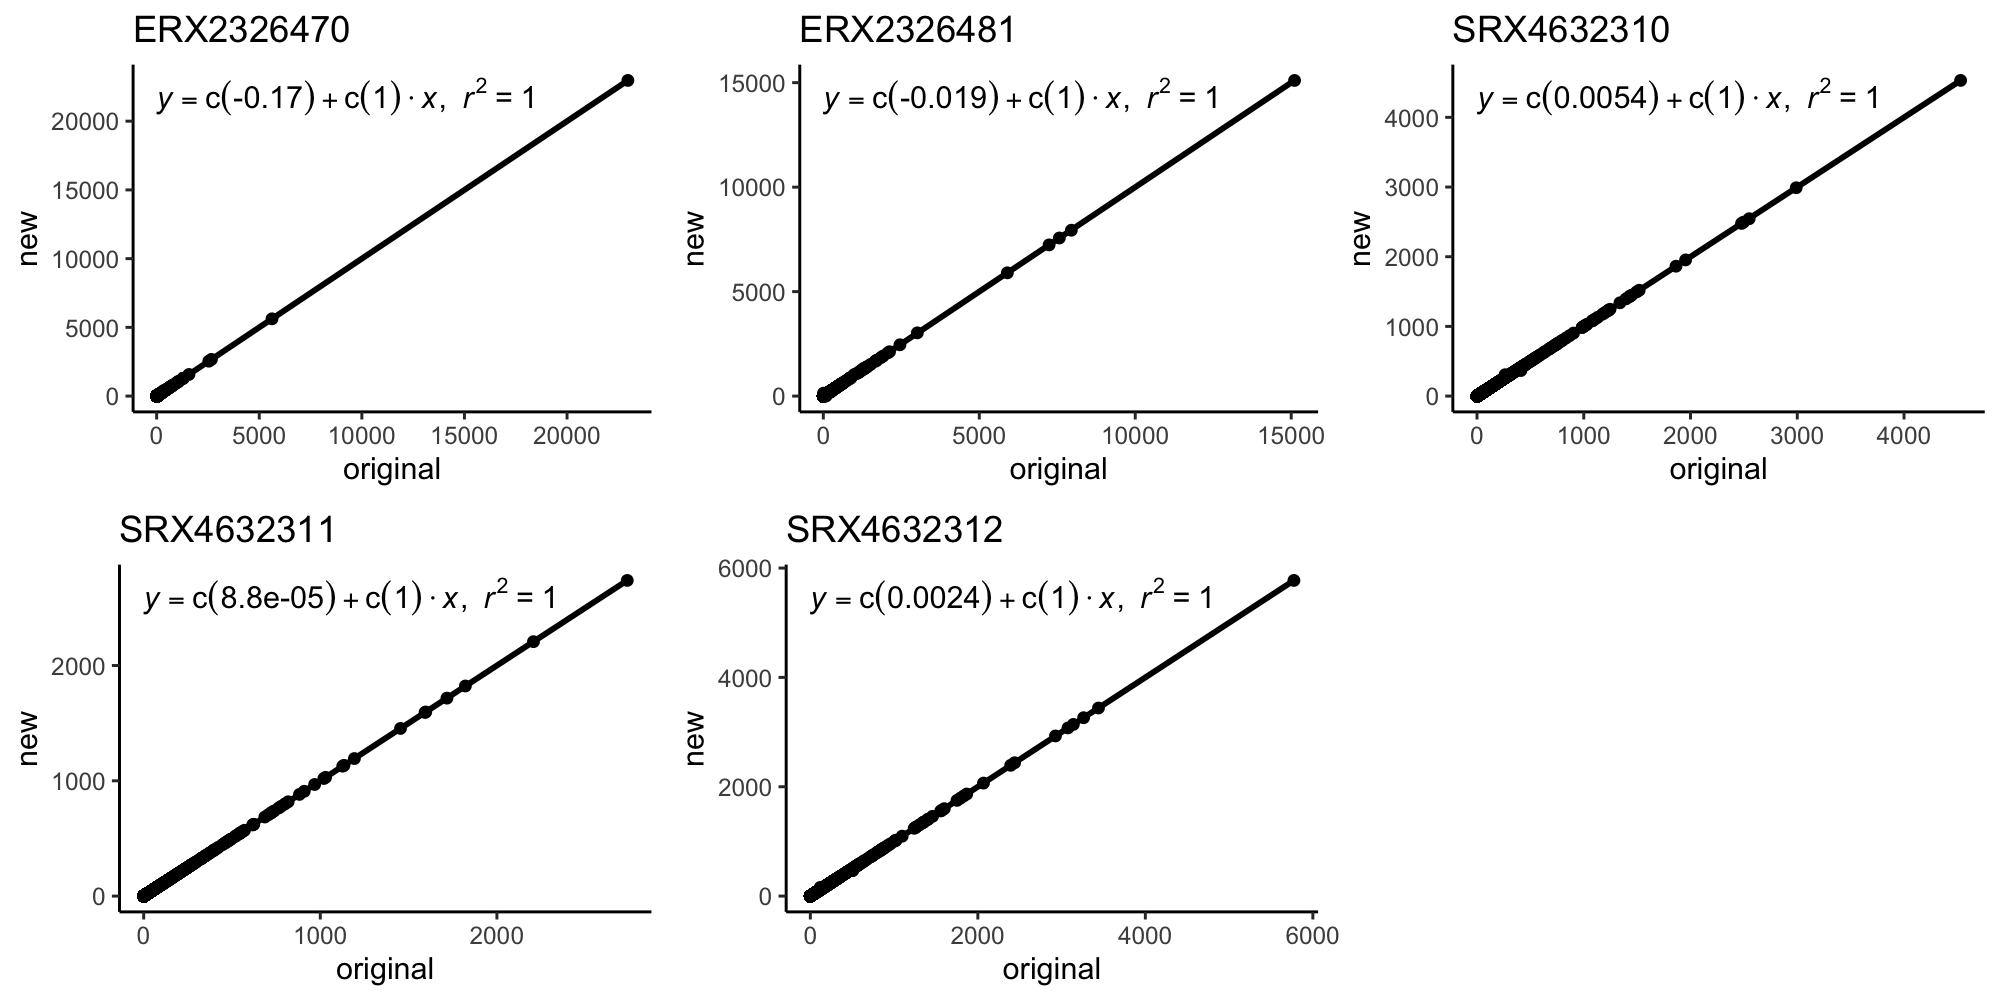

In [27]:
ggpubr::ggarrange(pa14_shared_lm[[1]], pa14_shared_lm[[2]], pa14_shared_lm[[3]],
                  pa14_shared_lm[[4]], pa14_shared_lm[[5]])

## PAO1

In [10]:
pao1_raw_og <- read_csv("inputs/original_compendia/num_reads_pao1_cdna_k15.csv", show_col_types = F) %>%
  rename(TxName = "...1")
colnames(pao1_raw_og) <- gsub("\\.salmon", "", basename(colnames(pa14_raw_og)))
pao1_raw_new <- read_csv("outputs/combined_new_srx/num_reads_pao1.csv", show_col_types = F)

pao1_raw_og_sub  <- pa14_raw_og[ , colnames(pao1_raw_og) %in% colnames(pao1_raw_new)]
pao1_raw_new_sub <- pa14_raw_new[, colnames(pao1_raw_new) %in% colnames(pao1_raw_og)]

pao1_sub <- left_join(pao1_raw_og_sub, pao1_raw_new_sub, by = "Name") %>%
  column_to_rownames("Name")

New names:
* `` -> ...1



In [28]:
pao1_shared_lm <- lapply(shared_srx_acc, FUN = function(x){compare_raw(pao1_raw_og, pao1_raw_new, x)})

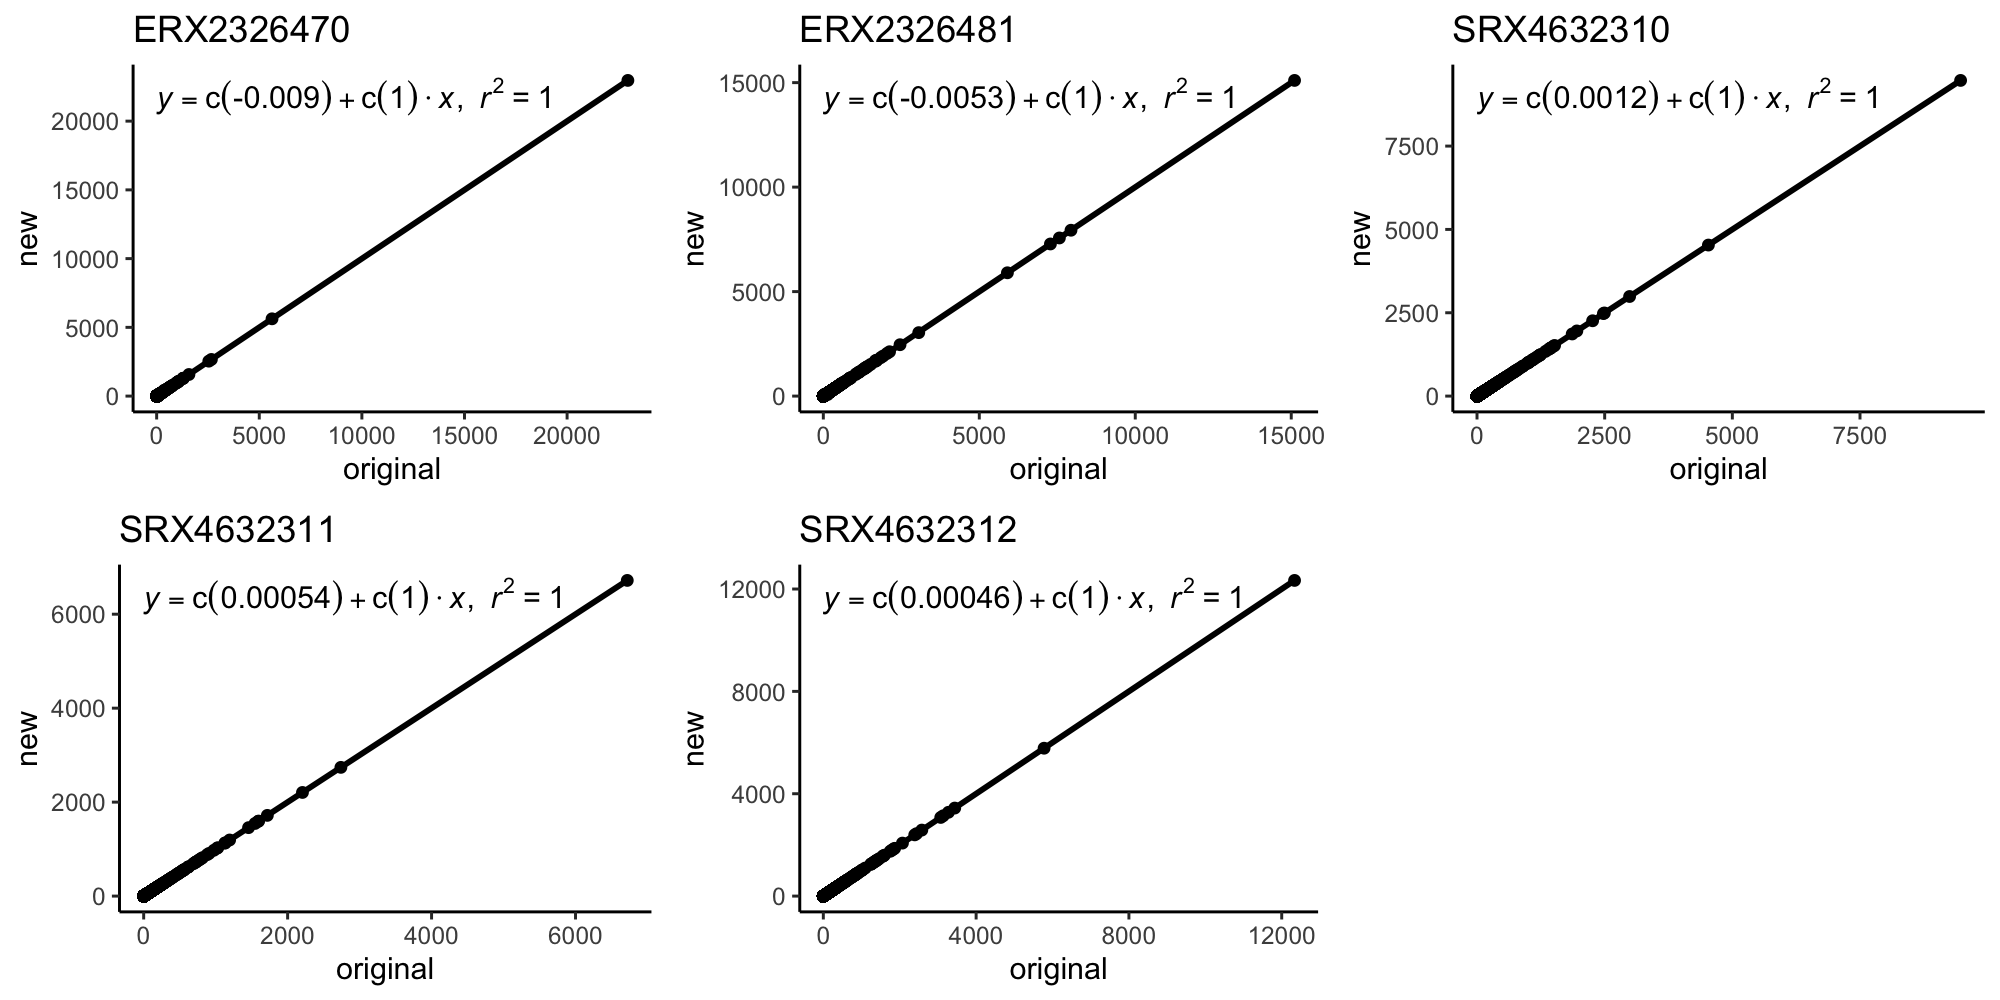

In [29]:
ggpubr::ggarrange(pao1_shared_lm[[1]], pao1_shared_lm[[2]], pao1_shared_lm[[3]],
                  pao1_shared_lm[[4]], pao1_shared_lm[[5]])